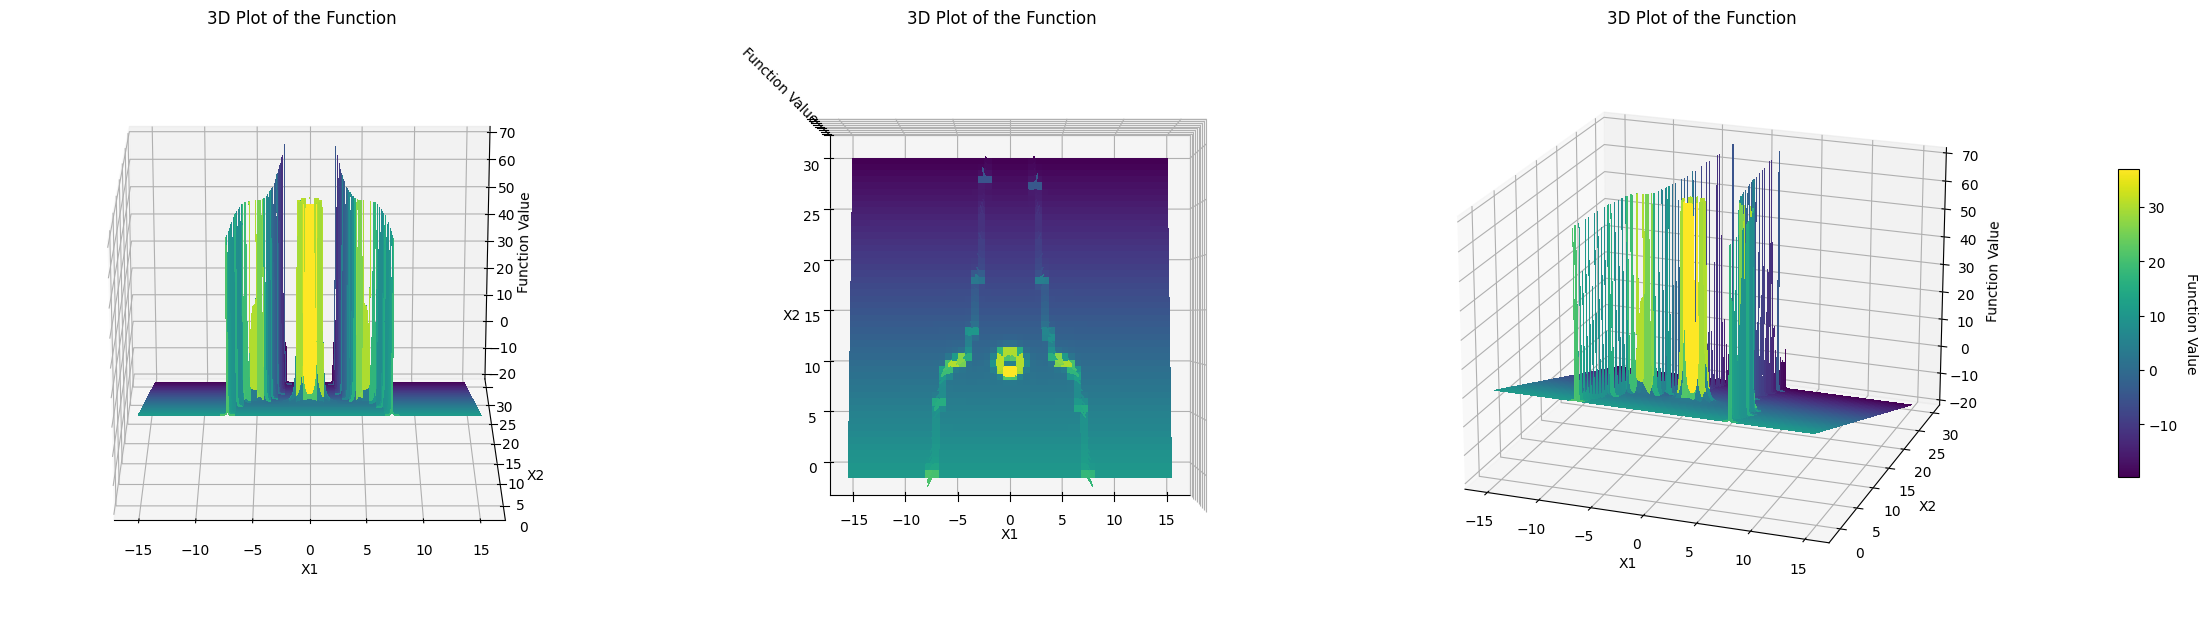

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib.colors import Normalize

# Create a 3D subplot
fig, ax = plt.subplots(1, 3, subplot_kw={"projection": "3d"}, figsize=(32, 8))

# Make data
x1 = np.linspace(-15, 15, 1000)
x2 = np.linspace(-1, 30, 1000)
x1, x2 = np.meshgrid(x1, x2)

center = (0, 10)
radius = 1
w1, w2 = 10, 5

# Define the function with clipping
#u = (np.sqrt((x1 - center[0])**2 + (x2 - center[1])**2)-radius)**-2 + np.abs(5 - x1)**-2 + np.abs(-5 - x1)**-2- x2
u = (np.sqrt((x1 - center[0])**2 + (x2 - center[1])**2)-radius)**-2 + (w1 - x2 + (x1+w2)**3)**-2 + (w1 - x2 + (-x1+w2)**3)**-2 - x2 + 10


# Clip function values to a reasonable range
u_min, u_max = -20, 70
u = np.clip(u, u_min, u_max)

# Plot the surface

for i in range(3):
    surf = ax[i].plot_surface(x1, x2, u, cmap='viridis', linewidth=0, antialiased=False)
    ax[i].set_zlim(u_min, u_max)
    ax[i].zaxis.set_major_locator(LinearLocator(10))
    ax[i].set_xlabel('X1')
    ax[i].set_ylabel('X2')
    ax[i].set_zlabel('Function Value')
    ax[i].set_title('3D Plot of the Function')


# Add a color bar which maps values to colors
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=15)
cbar.set_label('Function Value', rotation=270, labelpad=15)

# Adjust the view angle for better visibility
ax[0].view_init(elev=20, azim=-90)
ax[1].view_init(elev=90, azim=-90)
ax[2].view_init(elev=20, azim=-70)

ax[1].zaxis.set_ticklabels([])

# Show the plot
plt.show()


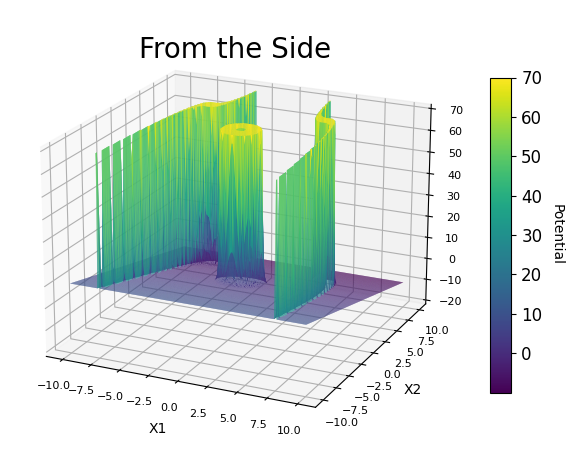

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.tri import Triangulation

# Function definition (modify as needed)
def my_function(x1, x2, center, radius, wall, exp=-2):
    return (np.sqrt((x1 - center[0])**2 + (x2 - center[1])**2) - radius)**exp + (wall - x2 - (x1 - wall)**3)**exp + (-wall + x2 - (x1 + wall)**3)**exp - x2

# Parameters
center = [0, 0]
radius = 1
wall = 5

# Create a grid of points
x1 = np.linspace(-10, 10, 200)
x2 = np.linspace(-10, 10, 200)
x1, x2 = np.meshgrid(x1, x2)

# Evaluate the function
u = my_function(x1, x2, center, radius, wall, exp=-10)

# Clip function values to a reasonable range
u_min, u_max = -20, 70
u = np.clip(u, u_min, u_max)

# Create a triangular mesh
triang = Triangulation(x1.flatten(), x2.flatten())

# Plot settings
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the triangular surface
surf = ax.plot_trisurf(triang, u.flatten(), cmap='viridis', linewidth=0, antialiased=True)

# Set axis labels and limits
ax.set_xlabel('X1')
ax.set_ylabel('X2')
#ax.set_zlabel('Function Value')
ax.set_title('From the Side', fontsize=20, y=.95)
ax.set_zlim(u_min, u_max)

#ax.zaxis.set_ticklabels([])
ax.tick_params(axis='both', which='major', labelsize=8)

ax.view_init(elev=20, azim=-65)

# Add a color bar
cbar = fig.colorbar(surf, ax=ax, shrink=0.7, aspect=15)
cbar.set_label('Potential', rotation=270, labelpad=15)
cbar.ax.tick_params(labelsize=12)


fig.tight_layout()

# Show the plot
plt.show()

C:\Users\wille\AppData\Local\Temp\ipykernel_20940\368831307.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
C:\Users\wille\AppData\Local\Temp\ipykernel_20940\368831307.py:57: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


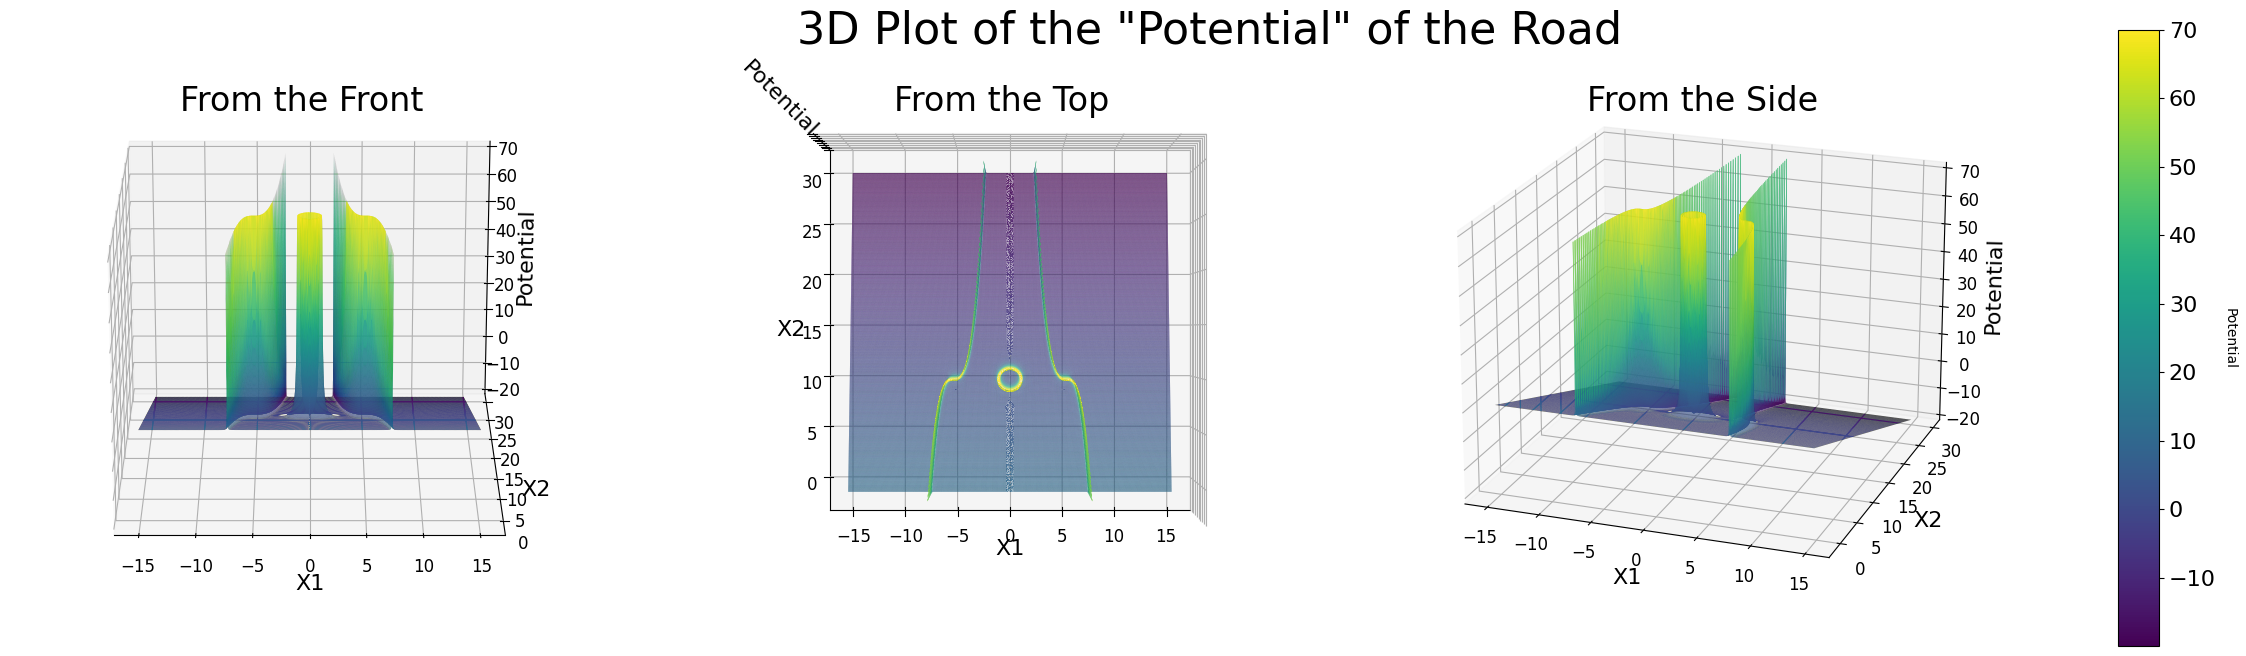

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator
from matplotlib.tri import Triangulation

# Create a 3D subplot
fig, ax = plt.subplots(1, 3, subplot_kw={"projection": "3d"}, figsize=(32, 16))

# Make data
x1 = np.linspace(-15, 15, 1000)
x2 = np.linspace(-1, 30, 1000)
x1, x2 = np.meshgrid(x1, x2)

center = (0, 10)
radius = 1
w1, w2 = 10, 5

# Define the function with clipping
u = (np.sqrt((x1 - center[0])**2 + (x2 - center[1])**2) - radius)**-2 + (w1 - x2 + (x1 + w2)**3)**-2 + (w1 - x2 + (-x1 + w2)**3)**-2 - x2 + 10

# Clip function values to a reasonable range
u_min, u_max = -20, 70
u = np.clip(u, u_min, u_max)

# Plot the surface
for i in range(3):
    triang = Triangulation(x1.flatten(), x2.flatten())
    surf = ax[i].plot_trisurf(triang, u.flatten(), cmap='viridis', linewidth=0, antialiased=True)
    ax[i].set_zlim(u_min, u_max)
    ax[i].zaxis.set_major_locator(LinearLocator(10))
    ax[i].set_xlabel('X1', fontsize=16)
    ax[i].set_ylabel('X2', fontsize=16)
    ax[i].set_zlabel('Potential', fontsize=16)

    ax[i].tick_params(labelsize=12)

yy = 0.95
ax[0].set_title('From the Front', fontsize=24, y=yy)
ax[1].set_title('From the Top', fontsize=24, y=yy)
ax[2].set_title('From the Side', fontsize=24, y=yy)

# Add a color bar which maps values to colors
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=15)
cbar.set_label('Potential', rotation=270, labelpad=15)
cbar.ax.tick_params(labelsize=16)

# Adjust the view angle for better visibility
ax[0].view_init(elev=20, azim=-90)
ax[1].view_init(elev=90, azim=-90)
ax[2].view_init(elev=20, azim=-70)

ax[1].zaxis.set_ticklabels([])

fig.suptitle('3D Plot of the "Potential" of the Road', fontsize=32, y=0.70)

fig.tight_layout()

# Show the plot
plt.show()

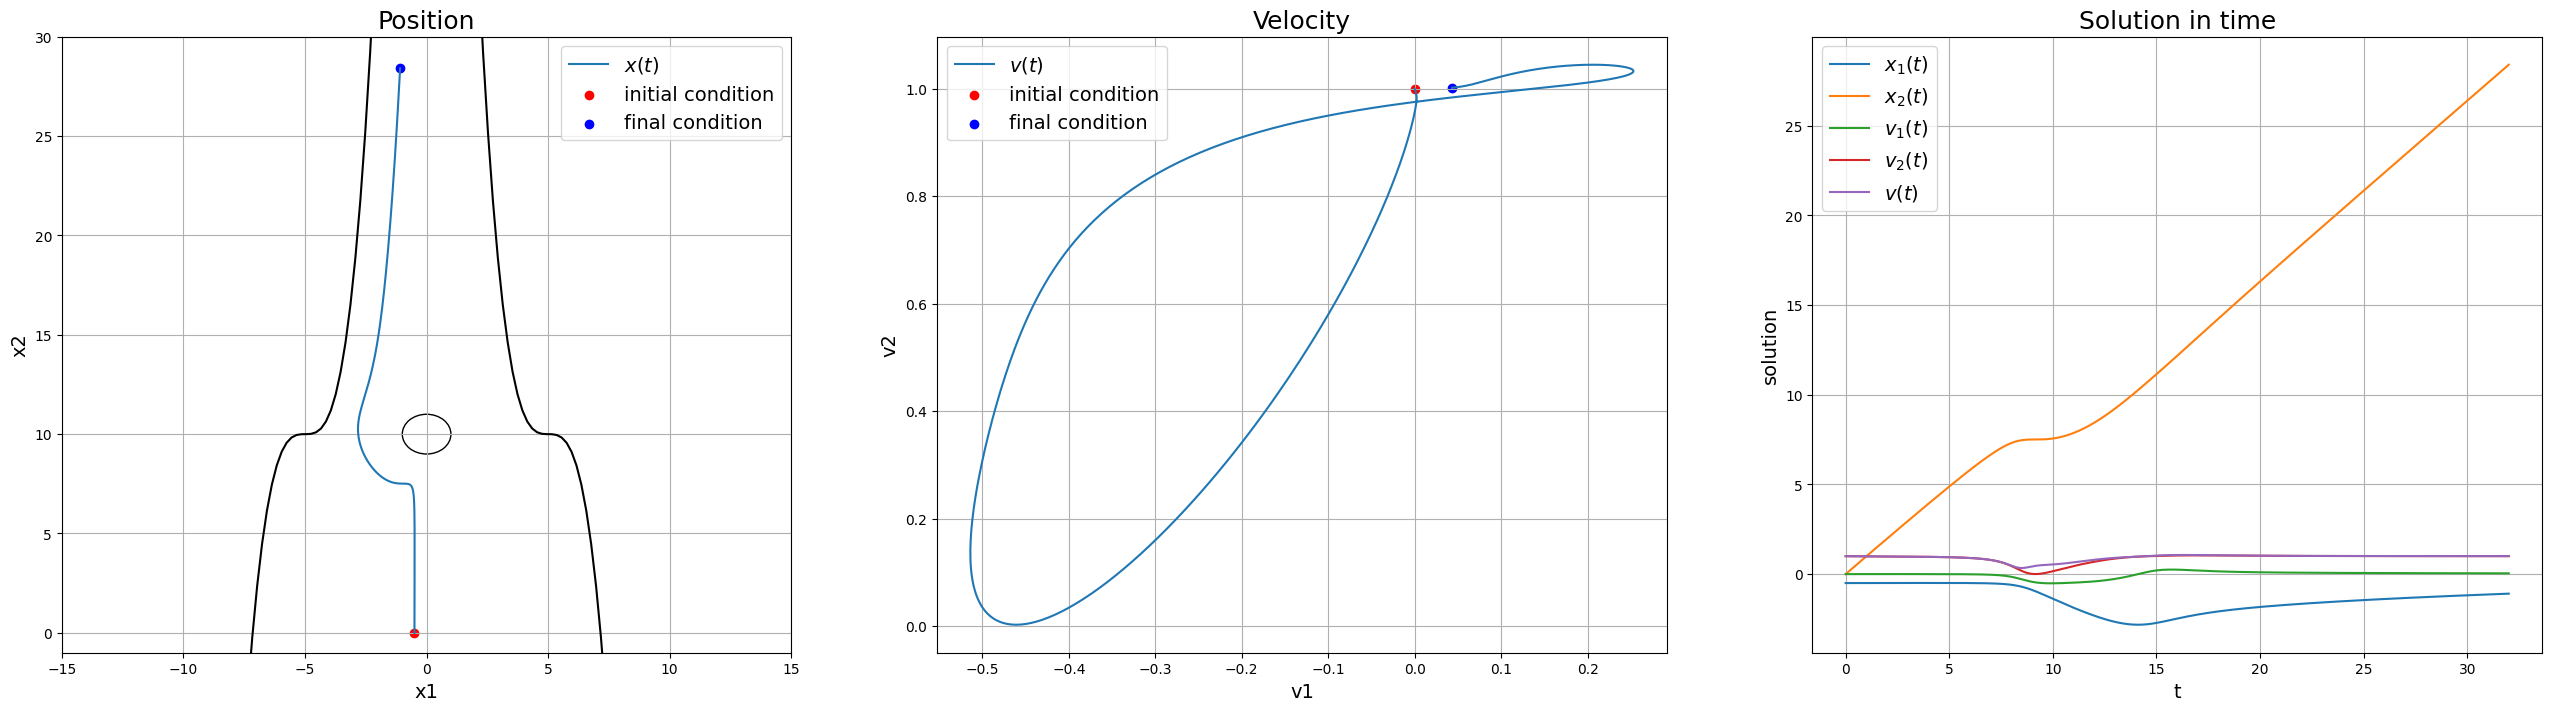

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import math

def plot_solution(solution, center, radius):
    # Plot the results
    fig, ax = plt.subplots(1, 3, figsize=(32, 8))


    ax[0].plot(solution.y[0], solution.y[1], label='$x(t)$')
    ax[0].scatter(solution.y[0][0], solution.y[1][0], label='initial condition', color='red') # plot initial condition
    ax[0].scatter(solution.y[0][-1], solution.y[1][-1], label='final condition', color='blue') # plot final condition

    circle = plt.Circle((center[0], center[1]), radius, color='k', fill=False)
    ax[0].add_artist(circle)

    def g(x, w1=w1, w2=w2):
        return w1+(x+w2)**3
    
    def g2(x, w1=w1, w2=w2):
        return w1+(-x+w2)**3

    ax[0].plot(np.linspace(-10, 10, 100), [g(x) for x in np.linspace(-10, 10, 100)], color='k')
    ax[0].plot(np.linspace(-10, 10, 100), [g2(x) for x in np.linspace(-10, 10, 100)], color='k')

    ax[0].set_xlabel('x1',fontsize="14")
    ax[0].set_ylabel('x2',fontsize="14")
    ax[0].set_title('Position', fontsize="18")

    ax[0].set_xlim([-15, 15])
    ax[0].set_ylim([-1, 30])

    ax[0].grid(True)
    ax[0].legend(fontsize="14")

    ax[1].plot(solution.y[2], solution.y[3], label='$v(t)$')
    ax[1].scatter(solution.y[2][0], solution.y[3][0], label='initial condition', color='red') # plot initial condition
    ax[1].scatter(solution.y[2][-1], solution.y[3][-1], label='final condition', color='blue') # plot final condition

    ax[1].set_xlabel('v1',fontsize="14")
    ax[1].set_ylabel('v2',fontsize="14")
    ax[1].set_title('Velocity', fontsize="18")

    ax[1].grid(True)
    ax[1].legend(fontsize="14")

    ax[2].plot(solution.t, solution.y[0], label='$x_1(t)$')
    ax[2].plot(solution.t, solution.y[1], label='$x_2(t)$')
    ax[2].plot(solution.t, solution.y[2], label='$v_1(t)$')
    ax[2].plot(solution.t, solution.y[3], label='$v_2(t)$')

    velocity = np.sqrt(solution.y[2]**2 + solution.y[3]**2)
    ax[2].plot(solution.t, velocity, label='$v(t)$')

    ax[2].set_xlabel('t',fontsize="14")
    ax[2].set_ylabel('solution',fontsize="14")
    ax[2].set_title('Solution in time', fontsize="18")

    ax[2].grid(True)
    ax[2].legend(fontsize="14")

    plt.show()

# Define the system of coupled ODEs for 4 dimensions
def system(t, y):
    x__1, x__2, v1, v2 = y

    
    du_dx1 = -0.1234567901e1 / (math.sqrt(0.1234567901e1 * x__1 ** 2 + (0.1111111111e1 * x__2 - 10) ** 2) - 1) ** 2 * (0.1234567901e1 * x__1 ** 2 + (0.1111111111e1 * x__2 - 10) ** 2) ** (-0.1e1 / 0.2e1) * x__1 - 0.3333333333e1 / (10 - 0.1111111111e1 * x__2 + (0.1111111111e1 * x__1 + 5) ** 3) ** 2 * (0.1111111111e1 * x__1 + 5) ** 2 + 0.3333333333e1 / (10 - 0.1111111111e1 * x__2 + (-0.1111111111e1 * x__1 + 5) ** 3) ** 2 * (-0.1111111111e1 * x__1 + 5) ** 2
    du_dx2 = -0.1e1 / (math.sqrt(0.1234567901e1 * x__1 ** 2 + (0.1111111111e1 * x__2 - 10) ** 2) - 1) ** 2 * (0.1234567901e1 * x__1 ** 2 + (0.1111111111e1 * x__2 - 10) ** 2) ** (-0.1e1 / 0.2e1) * (0.2469135802e1 * x__2 - 0.2222222222e2) / 2 - 1 + 0.1111111111e1 / (10 - 0.1111111111e1 * x__2 + (0.1111111111e1 * x__1 + 5) ** 3) ** 2 + 0.1111111111e1 / (10 - 0.1111111111e1 * x__2 + (-0.1111111111e1 * x__1 + 5) ** 3) ** 2

    noise = np.random.normal(0,1)
    noise = 0


    dx1_dt = v1
    dx2_dt = v2
    dv1_dt = -du_dx1 - l * v1 + noise
    dv2_dt = -du_dx2 - l * v2 + noise

    return [dx1_dt, dx2_dt, dv1_dt, dv2_dt]

# Set the initial conditions
#initial_conditions = [0, 0, 0, 16]
initial_conditions = [-0.5, 0, 0, 1]

# Set the time span
t_max = 32
t_span = (0, t_max)

center = np.array([0, 10])
radius = 1

w1, w2 = 10, 5

l = 1 # friction
s = 1 # slope


# r = 1, l = 1, s = 1, w1 = 10, w2 = 5, x1=-1, v2=2, t_max=10 -> pretty cool solution
# Solve the ODEs
solution = solve_ivp(system, t_span, initial_conditions, t_eval=np.linspace(t_span[0], t_span[1], 1000), atol=1e-8, rtol=1e-8)

plot_solution(solution, center, radius)

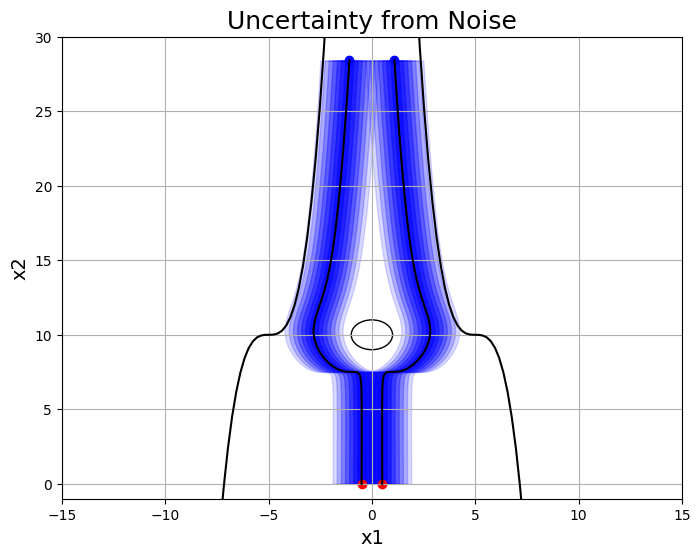

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))


ax.plot(solution.y[0], solution.y[1], c='k', label='$x(t)$')
ax.plot(-solution.y[0], solution.y[1], c='k', label='$x(t)$')

for sigma in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    ci_upper = solution.y[0] + sigma*2  # Example confidence interval
    ci_lower = solution.y[0] - sigma*2  # Example confidence interval
    ax.fill_betweenx(solution.y[1], ci_lower, ci_upper, color='b', alpha=(1-sigma)/2)
    ax.fill_betweenx(solution.y[1], -ci_lower, -ci_upper, color='b', alpha=(1-sigma)/2)


ax.scatter(solution.y[0][0], solution.y[1][0], label='initial condition', color='red') # plot initial condition
ax.scatter(solution.y[0][-1], solution.y[1][-1], label='final condition', color='blue') # plot final condition

ax.scatter(-solution.y[0][0], solution.y[1][0], label='initial condition', color='red') # plot initial condition
ax.scatter(-solution.y[0][-1], solution.y[1][-1], label='final condition', color='blue') # plot final condition

circle = plt.Circle((center[0], center[1]), radius, color='k', fill=False)
ax.add_artist(circle)

def g(x, w1=w1, w2=w2):
    return w1+(x+w2)**3

def g2(x, w1=w1, w2=w2):
    return w1+(-x+w2)**3

ax.plot(np.linspace(-10, 10, 100), [g(x) for x in np.linspace(-10, 10, 100)], color='k')
ax.plot(np.linspace(-10, 10, 100), [g2(x) for x in np.linspace(-10, 10, 100)], color='k')

ax.set_xlabel('x1',fontsize="14")
ax.set_ylabel('x2',fontsize="14")
ax.set_title('Uncertainty from Noise', fontsize="18")

ax.set_xlim([-15, 15])
ax.set_ylim([-1, 30])

ax.grid(True)
#ax.legend(fontsize="14")

0
1
2
3


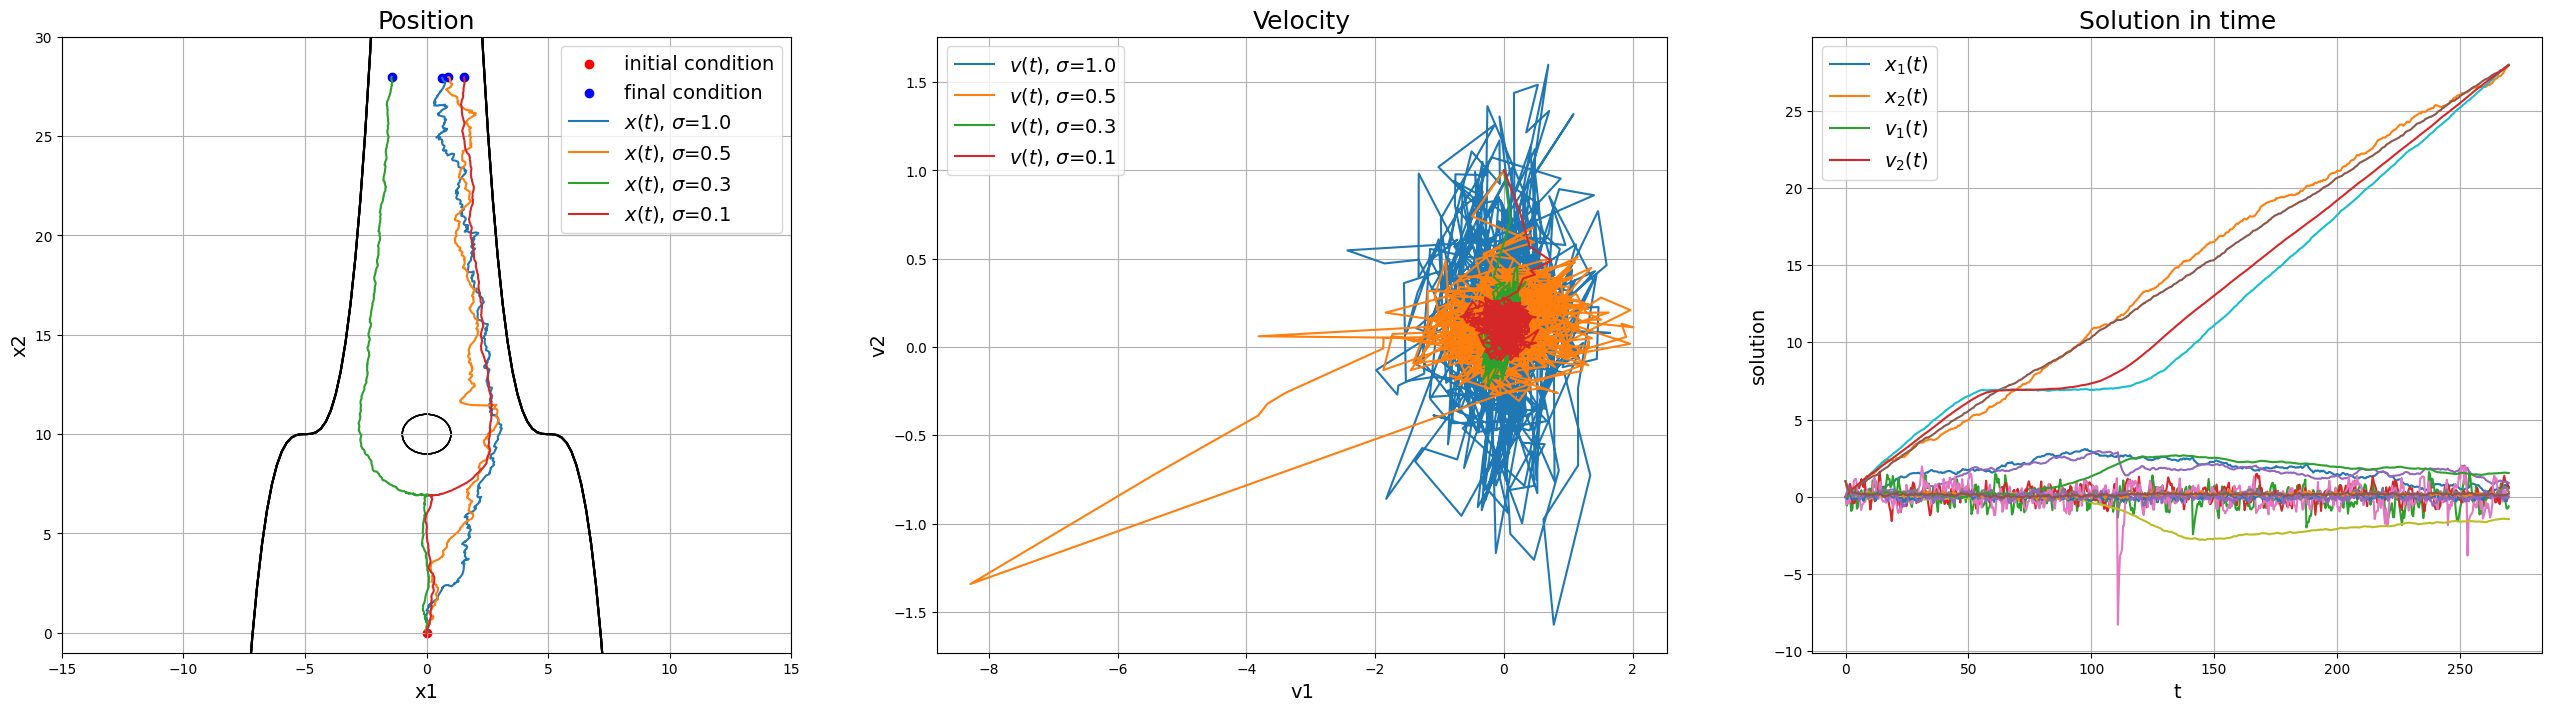

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sdeint
import math

def plot_solution(solution, center, radius):
    # Plot the results
    fig, ax = plt.subplots(1, 3, figsize=(32, 8))


    ax[0].plot(solution[:,0], solution[:,1], label='$x(t)$')
    ax[0].scatter(solution[:,0][0], solution[:,1][0], label='initial condition', color='red') # plot initial condition
    ax[0].scatter(solution[:,0][-1], solution[:,1][-1], label='final condition', color='blue') # plot final condition

    circle = plt.Circle((center[0], center[1]), radius, color='k', fill=False)
    ax[0].add_artist(circle)

    def g(x, w1=w1, w2=w2):
        return w1+(x+w2)**3
    
    def g2(x, w1=w1, w2=w2):
        return w1+(-x+w2)**3

    ax[0].plot(np.linspace(-10, 10, 100), [g(x) for x in np.linspace(-10, 10, 100)], color='k')
    ax[0].plot(np.linspace(-10, 10, 100), [g2(x) for x in np.linspace(-10, 10, 100)], color='k')

    ax[0].set_xlabel('x1')
    ax[0].set_ylabel('x2')
    ax[0].set_title('Position')

    ax[0].set_xlim([-15, 15])
    ax[0].set_ylim([-1, 30])

    ax[0].grid(True)
    ax[0].legend()

    ax[1].plot(solution[:,2], solution[:,3], label='$v(t)$')
    ax[1].scatter(solution[:,2][0], solution[:,3][0], label='initial condition', color='red') # plot initial condition
    ax[1].scatter(solution[:,2][-1], solution[:,3][-1], label='final condition', color='blue') # plot final condition

    ax[1].set_xlabel('v1')
    ax[1].set_ylabel('v2')
    ax[1].set_title('Velocity')

    ax[1].grid(True)
    ax[1].legend()

    ax[2].plot(tspan, solution[:,0], label='$x_1(t)$')
    ax[2].plot(tspan, solution[:,1], label='$x_2(t)$')
    ax[2].plot(tspan, solution[:,2], label='$v_1(t)$')
    ax[2].plot(tspan, solution[:,3], label='$v_2(t)$')

    velocity = np.sqrt(solution[:,2]**2 + solution[:,3]**2)
    ax[2].plot(tspan, velocity, label='$v(t)$')

    ax[2].set_xlabel('t')
    ax[2].set_ylabel('solution')
    ax[2].set_title('Solution in time')

    ax[2].grid(True)
    ax[2].legend()

    plt.show()



def plot_solutions(solutions, center, radius):
    # Plot the results
    fig, ax = plt.subplots(1, 3, figsize=(32, 8))

    for j in range(n_solutions):
        i = n_solutions-(j+1)
        solution = solutions[i]
        time = times[i]
        
        if j == 0:
            
            ax[0].scatter(solution[:,0][0], solution[:,1][0], label='initial condition', color='red') # plot initial condition
            ax[0].scatter(solution[:,0][-1], solution[:,1][-1], label='final condition', color='blue') # plot final condition
        
        else:
            #ax[0].plot(solution[:,0], solution[:,1])
            #ax[0].scatter(solution[:,0][0], solution[:,1][0], color='red') # plot initial condition
            ax[0].scatter(solution[:,0][-1], solution[:,1][-1], color='blue') # plot final condition
        ax[0].plot(solution[:,0], solution[:,1], label='$x(t)$, $\sigma$='+str(sigmas[i]))


        circle = plt.Circle((center[0], center[1]), radius, color='k', fill=False)
        ax[0].add_artist(circle)

        def g(x, w1=w1, w2=w2):
            return w1+(x+w2)**3
        
        def g2(x, w1=w1, w2=w2):
            return w1+(-x+w2)**3

        ax[0].plot(np.linspace(-10, 10, 100), [g(x) for x in np.linspace(-10, 10, 100)], color='k')
        ax[0].plot(np.linspace(-10, 10, 100), [g2(x) for x in np.linspace(-10, 10, 100)], color='k')

        ax[0].set_xlabel('x1', fontsize="14")
        ax[0].set_ylabel('x2', fontsize="14")
        ax[0].set_title('Position', fontsize="18")

        ax[0].set_xlim([-15, 15])
        ax[0].set_ylim([-1, 30])

        ax[0].grid(True)
        ax[0].legend(fontsize="14")

        ax[1].plot(solution[:,2], solution[:,3], label='$v(t)$, $\sigma$='+str(sigmas[i]))
        #ax[1].set_xscale('log')
        #ax[1].set_yscale('log')

        '''if i == 0:
            ax[1].plot(solution[:,2], solution[:,3], label='$v(t)$, $\sigma$='+str(sigmas[i]))
            
        elif i == n_solutions:
            ax[1].plot(solution[:,2], solution[:,3], label='$v(t)$, $\sigma$='+str(sigmas[i]))
            #ax[1].scatter(solution[:,2][0], solution[:,3][0], label='initial condition', color='red') # plot initial condition
            #ax[1].scatter(solution[:,2][-1], solution[:,3][-1], label='final condition', color='blue') # plot final condition

        else:
            ax[1].plot(solution[:,2], solution[:,3], label='$v(t)$, $\sigma$='+str(sigmas[i]))
            #ax[1].scatter(solution[:,2][0], solution[:,3][0], color='red') # plot initial condition
            #ax[1].scatter(solution[:,2][-1], solution[:,3][-1], color='blue') # plot final condition'''



        ax[1].set_xlabel('v1', fontsize="14")
        ax[1].set_ylabel('v2', fontsize="14")
        ax[1].set_title('Velocity', fontsize="18")

        ax[1].grid(True)
        ax[1].legend(fontsize="14")

        velocity = np.sqrt(solution[:,2]**2 + solution[:,3]**2)
        
        t_span_modified = np.linspace(0, t_max, solution.shape[0])

        if j == 0:
            #ax[2].plot(t_span_modified, velocity, label='$v(t)$')
            ax[2].plot(t_span_modified, solution[:,0], label='$x_1(t)$')
            ax[2].plot(t_span_modified, solution[:,1], label='$x_2(t)$')
            ax[2].plot(t_span_modified, solution[:,2], label='$v_1(t)$')
            ax[2].plot(t_span_modified, solution[:,3], label='$v_2(t)$')
        else:
            #ax[2].plot(t_span_modified, velocity)
            ax[2].plot(t_span_modified, solution[:,0])
            ax[2].plot(t_span_modified, solution[:,1])
            ax[2].plot(t_span_modified, solution[:,2])
            ax[2].plot(t_span_modified, solution[:,3])


        

        ax[2].set_xlabel('t', fontsize="14")
        ax[2].set_ylabel('solution', fontsize="14")
        ax[2].set_title('Solution in time', fontsize="18")

        ax[2].grid(True)
        ax[2].legend(fontsize="14")

    plt.show()
# Define the system of coupled ODEs for 4 dimensions
def system(y, t):
    x__1, x__2, v1, v2 = y[0], y[1], y[2], y[3]

    
    du_dx1 = -0.1234567901e1 / (math.sqrt(0.1234567901e1 * x__1 ** 2 + (0.1111111111e1 * x__2 - 10) ** 2) - 1) ** 2 * (0.1234567901e1 * x__1 ** 2 + (0.1111111111e1 * x__2 - 10) ** 2) ** (-0.1e1 / 0.2e1) * x__1 - 0.3333333333e1 / (10 - 0.1111111111e1 * x__2 + (0.1111111111e1 * x__1 + 5) ** 3) ** 2 * (0.1111111111e1 * x__1 + 5) ** 2 + 0.3333333333e1 / (10 - 0.1111111111e1 * x__2 + (-0.1111111111e1 * x__1 + 5) ** 3) ** 2 * (-0.1111111111e1 * x__1 + 5) ** 2
    du_dx2 = -0.1e1 / (math.sqrt(0.1234567901e1 * x__1 ** 2 + (0.1111111111e1 * x__2 - 10) ** 2) - 1) ** 2 * (0.1234567901e1 * x__1 ** 2 + (0.1111111111e1 * x__2 - 10) ** 2) ** (-0.1e1 / 0.2e1) * (0.2469135802e1 * x__2 - 0.2222222222e2) / 2 - 1 + 0.1111111111e1 / (10 - 0.1111111111e1 * x__2 + (0.1111111111e1 * x__1 + 5) ** 3) ** 2 + 0.1111111111e1 / (10 - 0.1111111111e1 * x__2 + (-0.1111111111e1 * x__1 + 5) ** 3) ** 2

    du_dx1 = -0.2469135802e1 / (math.sqrt(0.1234567901e1 * x__1 ** 2 + (0.1111111111e1 * x__2 - 10) ** 2) - 1) ** 3 * (0.1234567901e1 * x__1 ** 2 + (0.1111111111e1 * x__2 - 10) ** 2) ** (-0.1e1 / 0.2e1) * x__1 - 0.6666666666e1 / (10 - 0.1111111111e1 * x__2 + (0.1111111111e1 * x__1 + 5) ** 3) ** 3 * (0.1111111111e1 * x__1 + 5) ** 2 + 0.6666666666e1 / (10 - 0.1111111111e1 * x__2 + (-0.1111111111e1 * x__1 + 5) ** 3) ** 3 * (-0.1111111111e1 * x__1 + 5) ** 2

    du_dx2 = -0.1e1 / (math.sqrt(0.1234567901e1 * x__1 ** 2 + (0.1111111111e1 * x__2 - 10) ** 2) - 1) ** 3 * (0.1234567901e1 * x__1 ** 2 + (0.1111111111e1 * x__2 - 10) ** 2) ** (-0.1e1 / 0.2e1) * (0.2469135802e1 * x__2 - 0.2222222222e2) - 1 + 0.2222222222e1 / (10 - 0.1111111111e1 * x__2 + (0.1111111111e1 * x__1 + 5) ** 3) ** 3 + 0.2222222222e1 / (10 - 0.1111111111e1 * x__2 + (-0.1111111111e1 * x__1 + 5) ** 3) ** 3

    noise = np.random.normal(0,sigma)


    dx1_dt = v1
    dx2_dt = v2
    dv1_dt = -du_dx1 - l * v1 + noise
    dv2_dt = -du_dx2 - l * v2 + noise

    return np.array([dx1_dt, dx2_dt, dv1_dt, dv2_dt])

# Set the initial conditions
initial_conditions = ([0, 0, 0, 1])

# Set the time span
t_max = 270
t_span = (0, t_max)
tspan = np.linspace(0, t_max, 1000)

center = np.array([0, 10])
radius = 1

w1, w2 = 10, 5

l = 6 # friction
s = 1 # slope

sigmas = [0.1, 0.3, 0.5, 1.0]
n_solutions = len(sigmas)

alphas = [s/max(sigmas) for s in sigmas]
alphas = [1 for s in sigmas]

solutions = []
    # Solve multiple IVP's
for i in range(n_solutions):
    # Noise matrix
    sigma = sigmas[i]
    noise_v1 = np.random.normal(0,sigma)
    noise_v2 = np.random.normal(0,sigma)
    def GG(y, t):
        return np.diag([0, 0, noise_v1, noise_v2])

    solution = sdeint.itoint(system, GG, initial_conditions, tspan)
    if np.max(np.abs(solution[:,0])) > 5:
        while np.max(np.abs(solution[:,0])) > 5:
            solution = sdeint.itoint(system, GG, initial_conditions, tspan)

    print(i)
    solutions.append(solution)

for i in range(len(solutions)):
    solution = solutions[i]

    if len(np.where(solution[:,1]>28)[0])>0:
        goal_timestep = np.where(solution[:,1]>28)[0][0]
    else:
        goal_timestep = len(solution[:,1])
    
    solutions[i] = solution[:goal_timestep,:]



times = [solutions[i].shape[0] for i in range(len(alphas))]
max_time = max(times)
times = [np.round(time/max_time,2) for time in times]
times.reverse()




plot_solutions(solutions, center, radius)